# Sahar Tosif Jamal ----------------- The Sparks Foundation, GRIP
---
# Task 2: Predicting using Unsupervised ML, K Means Clustering on Iris Dataset
---
Completed on 6th November 2020

__K-means clustering__ is a clustering algorithm that aims to partition n observations into k clusters.

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [2]:
# Loading iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Size of dataset
iris_df.shape

(150, 4)

In [4]:
#Summary of Dataset
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


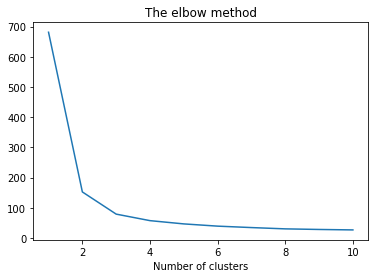

In [5]:
# Finding the optimum number of clusters for k-means classification
x = iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
x = x.values

from sklearn.cluster import KMeans
cs = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
    
# Plotting the results onto a line graph
plt.plot(range(1, 11), cs)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.show()

The __elbow method__ runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center.

In this we will be using 3 clusters as the optimum clusters is formed at __'3'__. The __optimum clusters__ is where the elbow occurs.

In [6]:
# Applying kmeans to the dataset 
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

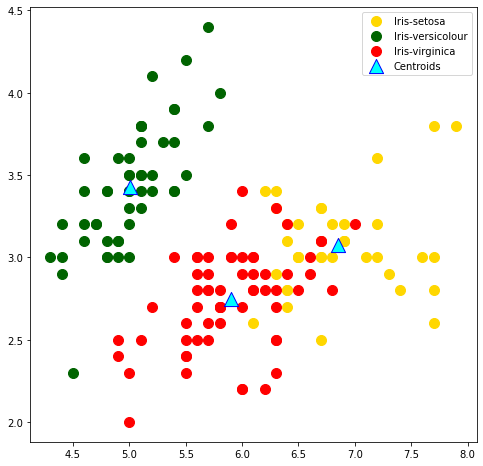

In [7]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(8,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'gold', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'darkgreen', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 200, c = 'cyan', 
            marker = '^', edgecolors='b', label = 'Centroids')

plt.legend()

As you can see we have plotted the dataset on the graph using scatter plot, with _yellow_ representing __Iris-Setosa__, _green_ as __Iris-Versicolour__, _red_ as __Iris-Virginica__ and the __Centroids__ are marked in _cyan triangles_.

This is known as __K - means Clustering__. It creates clusters or groups the points with K being the centroids of each cluster.

### Thank You!